In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("AirPassengers.csv")

In [3]:
data.head()
# first 5 rows of data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# data that is dependent on time--> timeseries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data["Month"]

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [6]:
data['Month'] = pd.to_datetime(data['Month'])
# to_datetime()---> used to convert column into datetime format

In [7]:
data["Month"]

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
data.index

RangeIndex(start=0, stop=144, step=1)

In [10]:
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [11]:
del data['Month']
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [15]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


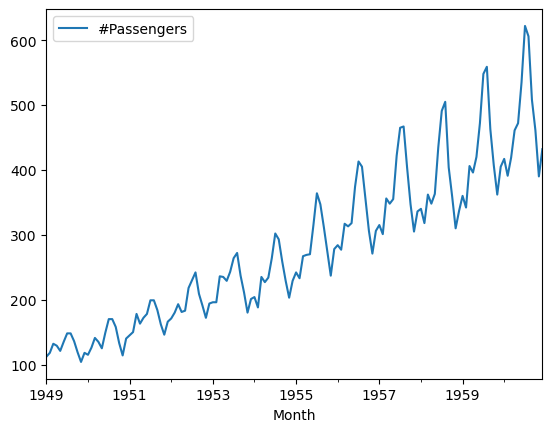

In [12]:
data.plot()
plt.show()
# data is not stationary
# it has trend
# it has seasonality

In [ ]:
how do i know for sure if my data is stationary?
- ad-fuller test
- kpss test

In [13]:
#checking the stationarity of the data 

# the statistical properties of a 
#process generating a time series
# do not change over time 


#Thus, time series with trends, 
#or with seasonality, are not stationary 
#— the trend and seasonality will affect the value of the 
#time series at different times.


from statsmodels.tsa.stattools import adfuller
#p-value > 0.05: ---> not stationary
#p-value <= 0.05: --> stationary
result = adfuller(data['#Passengers'])
#print(result)
#print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
	#print('\t%s: %.3f' % (key, value))
if result[1]>0.05:
	print('not stationary')
else:
	print("stationary")


p-value: 0.991880
not stationary



adf:float
The test statistic.

pvalue:float
MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).

usedlag:int
The number of lags used.

nobs:int
The number of observations used for the ADF regression and calculation of the critical values.

critical values:dict
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).

icbest:float
The maximized information criterion if autolag is not None.

resstoreResultStore, optional
A dummy class with results attached as attributes.

In [18]:
# adfuller --> p<0.05 ---> stationary
# kpss ------> p>0.05 ---> stationary

In [16]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(data['#Passengers'])
if p>0.05:
  print('stattionary')
else:
  print("not stationary")
print(p)

not stationary
0.01


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests 
we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests 
we fail to reject the null hypothesis (non-stationary).

 The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, 
it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.



In [19]:
data.rolling(window=12)

Rolling [window=12,center=False,axis=0,method=single]

<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

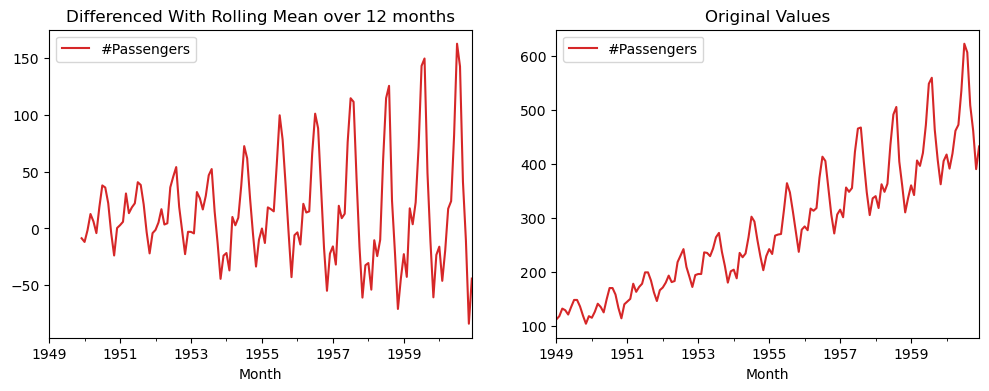

In [22]:
#Trend is a pattern in data that shows 
#the movement of a series to relatively
#higher or lower values over a long period of time

#removing trend using the rolling mean differencing 

rolling_mean = data.rolling(window=12).mean()

#Rolling means creating a rolling window with
# a specified size and perform calculations on
# the data in this window which, of course, rolls through the data.

#Rolling averages are useful for finding long-term trends otherwise
# disguised by occasional fluctuations. 
rolling_mean_detrended = data - rolling_mean

ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red", 
                            title="Differenced With Rolling Mean over 12 months", 
                            ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values", 
          ax=ax2)

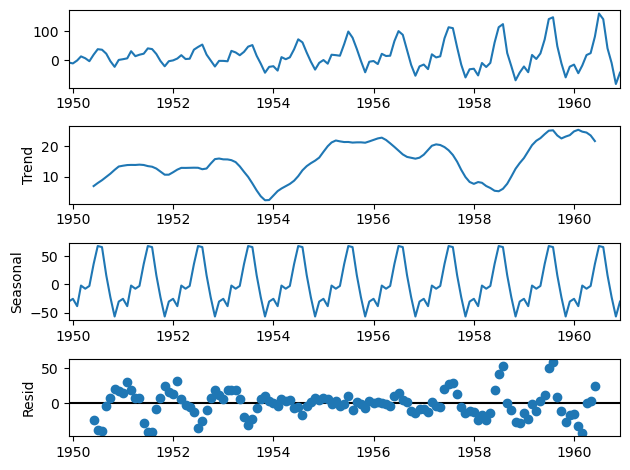

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())
#We can check the trend and seasonality using the
# seasonal_decompose() method.
decompose_result.plot();


#Here in the  chart, we can see the decomposed
# structure of data and the structure of the components 
#in the data set which were affecting it.

In [24]:
decompose_result

In [22]:
rolling_mean_detrended.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [25]:
rolling_mean_detrended.shift(2).head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [26]:
rolling_mean_detrended.head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


<AxesSubplot:title={'center':'Differenced With Rolling Mean over 12 months'}, xlabel='Month'>

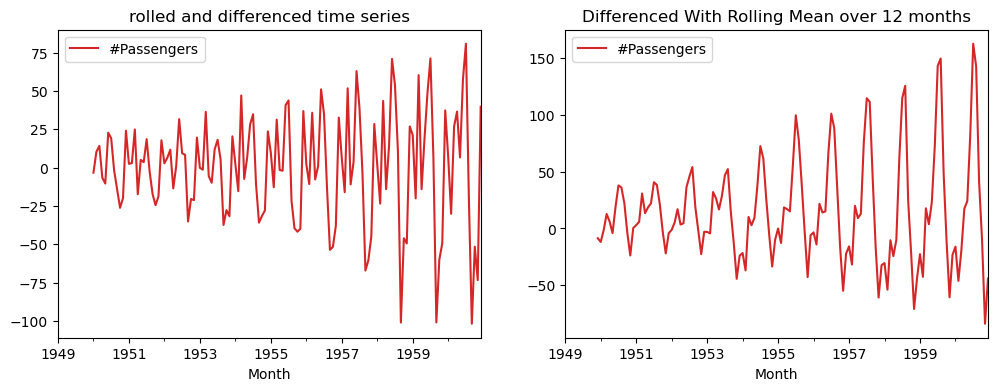

In [27]:
#removing seasonality from the time series
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red", 
                                 title="rolled and differenced time series", 
                                 ax=ax1)
ax1 = plt.subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red", 
                            title="Differenced With Rolling Mean over 12 months", 
                            ax=ax1)

<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

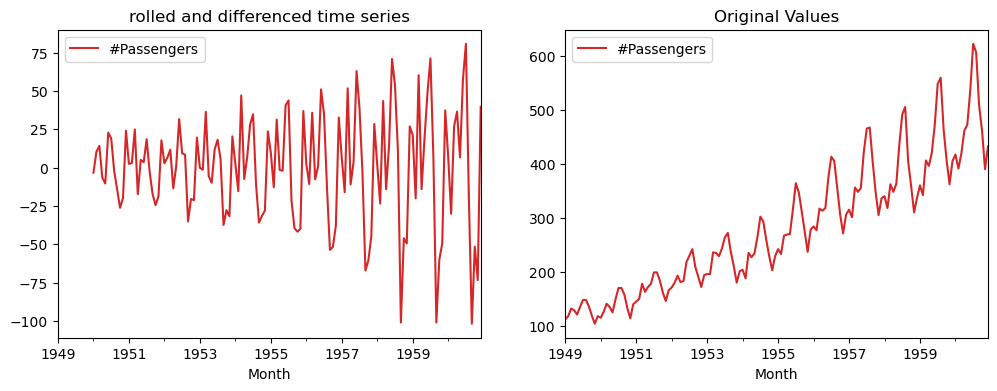

In [28]:
ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red", 
                                 title="rolled and differenced time series", 
                                 ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values",
          ax=ax2)

In [29]:
rolling_mean_detrended.shift().head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [30]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

In [31]:
rolling_mean_detrended_diff

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


In [32]:
result = adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())
#print(result)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.154483
p-value: 0.022775
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


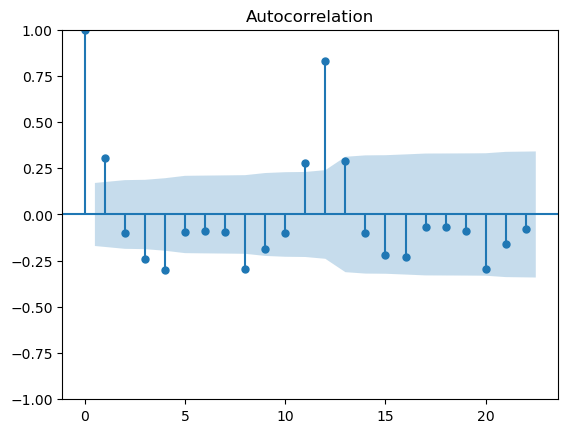

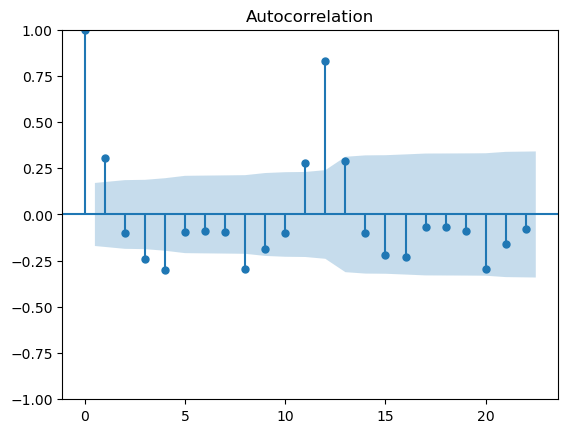

In [33]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
#To check for the stationarity of the time series,
# statsmodels provides a plot_acf method to plot an autocorrelation plot.
plot_acf(rolling_mean_detrended_diff['#Passengers'])


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


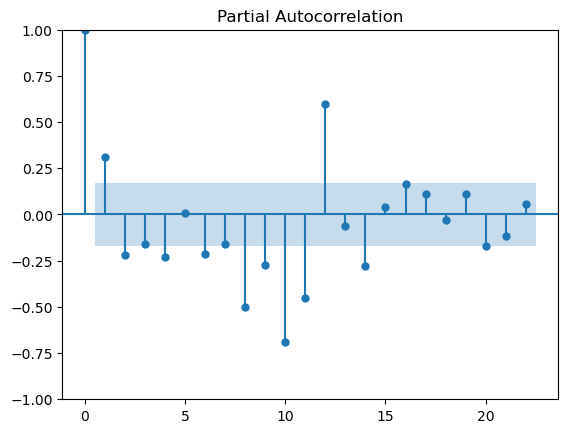

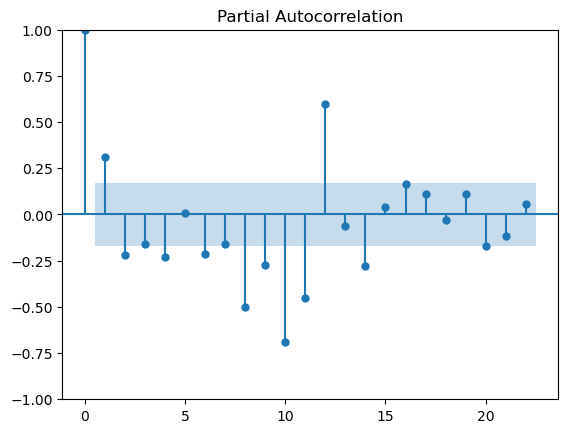

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['#Passengers'])

In [35]:
!pip install pmdarima
from pmdarima import auto_arima



ERROR: Could not find a version that satisfies the requirement pmdarima (from versions: none)
ERROR: No matching distribution found for pmdarima


Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pmdarima/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pmdarima/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping


ModuleNotFoundError: No module named 'pmdarima'

In [35]:
order = auto_arima(rolling_mean_detrended_diff['#Passengers'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Sat, 17 Dec 2022   AIC                           1235.785
Time:                        19:35:12   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.347      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9137      0.128     -7.155      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.885      0.000      -1.150      -0.492
ma.L3          0.7469      0.095      7.852      0.000       0.560       0.933
sigma2       586.1983     67.806      8.645      0.000     453.301     719.095
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [37]:
train = rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test = rolling_mean_detrended_diff.iloc[121:]['#Passengers']
# ARIMA ---> AR + MA +I ---> ARIMA--> 3= AR , I=0 , MA=3
model = sm.tsa.arima.ARIMA(train, order=(3,0,3))
model_fit = model.fit() # training 
model_fit.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -546.713
Date:                Sat, 17 Dec 2022   AIC                           1109.427
Time:                        19:35:34   BIC                           1131.727
Sample:                    01-01-1950   HQIC                          1118.483
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.040      1.628      0.103      -0.013       0.143
ar.L1          0.7921      0.116      6.838      0.000       0.565       1.019
ar.L2          0.3299      0.133      2.481      0.013       0.069       0.591
ar.L3         -0.5813      0.077     -7.571      0.000      -0.732      -0.431
ma.L1         -0.8687      2.558     -0.340      0.734      -5.883       4.145
ma.L2         -0.9992      2.296     -0.435      0.663      -5.499       3.501
ma.L3          0.8680      2.718      0.319      0.749      -4.460       6.196
sigma2       484.2934   1586.462      0.305      0.760   -2625.115    3593.702
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.98   Prob(JB):                         0.92
Heteroskedasticity (H):               5.91   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Dell\AppData\Local\Temp\ipykernel_14328\583994661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict'] = model_fit.predict(start= len(train),


<AxesSubplot:xlabel='Month'>

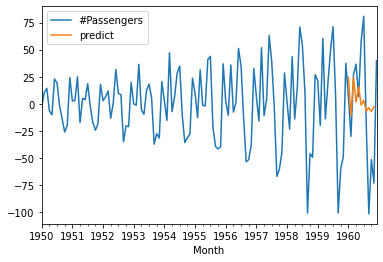

In [38]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start= len(train), 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


C:\Users\Dell\AppData\Local\Temp\ipykernel_14328\3222869760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict'] = model.predict(start= len(train) ,


<AxesSubplot:xlabel='Month'>

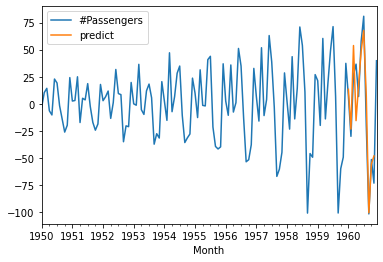

In [40]:
rolling_mean_detrended_diff['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

<AxesSubplot:xlabel='Month'>

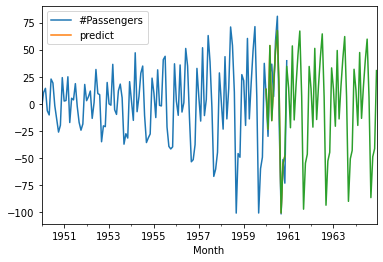

In [41]:
#predicting the projections for the next 5 years

forecast = model.forecast(steps=60)
rolling_mean_detrended_diff.plot()
forecast.plot()

In [42]:
type(forecast)

pandas.core.series.Series